In [90]:
import re

with open('dummy.py') as f:
    lines = f.read()

print(lines)

def my_function():
  print("Hello from a function")


def another_function():
    my_function1()
    my_function()


def yet_another_function():
  another_function()
  my_function()
  yet_another_function()


def my_last_function():
  yet_another_function()
  another_function()
  my_function()
  my_function1()

def an_unused_function():
  print()


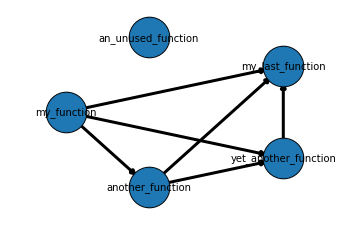

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

custom_function_name_compiler = re.compile(r"""
    ^def \s                # Starts with def
    (\D\w+)   # Function name
    \([\w+]*\):             # Arguments within the function
    $                     # Function has its own line
""", re.MULTILINE | re.VERBOSE)

custom_function_names = custom_function_name_compiler.findall(lines)



function_definition_compiler = re.compile(r"""
    ^def \s                # Starts with def
    \D\w+   # Function name
    \([\w+]*\):             # Arguments within the function
    $                     # Function has its own line
    (?:\s+\D\w+\(\))+
""", re.MULTILINE | re.VERBOSE)

called_functions_compiler = re.compile(r"""
    ^\s+(\D\w+)\(\)
""", re.MULTILINE | re.VERBOSE)

function_definitions = function_definition_compiler.findall(lines)

for function_definition in function_definitions:
    # Parse the function name
    calling_function = custom_function_name_compiler.match(function_definition).group(1)

    # Parse called function
    called_functions = called_functions_compiler.findall(function_definition)

    for called_function in called_functions:
        if called_function in custom_function_names:
            G.add_edge(called_function, calling_function)

    G.add_node(calling_function)

options = {
    "font_size": 10,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 10,
    "width": 3
}

pos = nx.shell_layout(G)
nx.draw_networkx(G, pos, **options)
nx.draw(G, pos, node_size=1500)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [4]:
import scripts.ancillary_functions as af
import re

def get_loose_ends(
    directory_or_file_path,
    do_search_recursively = True
):
    asdf = af.get_file_paths(directory_or_file_path, do_search_recursively)
    print(asdf)
    return(asdf)


aaa = re.compile(r"""
    \w+.py
""", re.MULTILINE | re.VERBOSE)

kk = get_loose_ends('.')

ttt = [aaa.search(file_name).string for file_name in kk if aaa.search(file_name) is not None]


['.git', '.vscode', 'dev.ipynb', 'dummy.py', 'LICENSE', 'main.py', 'README.md', 'scripts']


In [16]:
import re

python_file_name_compiler = re.compile(r"""
    \w+\.py
""", re.MULTILINE | re.VERBOSE)

print(python_file_name_compiler.findall("__pycache__"))

[]


In [88]:
import re

asdf = re.compile('^def[\s\S]*def')

asdf.findall('def my_function():\n\ta_definition()\ndef')


['def my_function():\n\ta_definition()\nde']

In [125]:
import re

# with open('scripts/ancillary_functions.py') as f:
with open('dummy.py') as f:
    lines = f.read()

called_func_compiler = re.compile(r'([a-zA-Z_][\w_]*)\((?:(?:[a-zA-Z_][\w_]*)*|(?(?:[a-zA-Z_][\w_]*, )*[a-zA-Z_][\w_]*))\)')

matches = called_func_compiler.findall(lines)
print(matches)

error: bad character in group name '?:[a-zA-Z_][\\w_]*, ' at position 46